# Setup

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, StratifiedShuffleSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Reading the Data and EDA

In [ ]:
data = pd.read_csv("housing_in_london_monthly_variables.csv", infer_datetime_format=True)

In [ ]:
data

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag
0,1995-01-01,city of london,91449,E09000001,17.0,NaN,1
1,1995-02-01,city of london,82203,E09000001,7.0,NaN,1
2,1995-03-01,city of london,79121,E09000001,14.0,NaN,1
3,1995-04-01,city of london,77101,E09000001,7.0,NaN,1
4,1995-05-01,city of london,84409,E09000001,10.0,NaN,1
...,...,...,...,...,...,...,...
13544,2019-09-01,england,249942,E92000001,64605.0,NaN,0
13545,2019-10-01,england,249376,E92000001,68677.0,NaN,0
13546,2019-11-01,england,248515,E92000001,67814.0,NaN,0
13547,2019-12-01,england,250410,E92000001,NaN,NaN,0


Take a Quick Look at the Data Structure

In [ ]:
print(data.head())
print(data.info())

         date            area  average_price       code  houses_sold  \
0  1995-01-01  city of london          91449  E09000001         17.0   
1  1995-02-01  city of london          82203  E09000001          7.0   
2  1995-03-01  city of london          79121  E09000001         14.0   
3  1995-04-01  city of london          77101  E09000001          7.0   
4  1995-05-01  city of london          84409  E09000001         10.0   

   no_of_crimes  borough_flag  
0           NaN             1  
1           NaN             1  
2           NaN             1  
3           NaN             1  
4           NaN             1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13549 entries, 0 to 13548
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           13549 non-null  object 
 1   area           13549 non-null  object 
 2   average_price  13549 non-null  int64  
 3   code           13549 non-null  object 
 4 

In [ ]:
# convert date from object Dtype to datetime Dtype
data.date = pd.to_datetime(data.date)

Missing Data

In [ ]:
# count missing values
print("House_sold Missing :", data['houses_sold'].isna().sum())
print("Crimes Missing :", data['no_of_crimes'].isna().sum())

House_sold Missing : 94
Crimes Missing : 6110


In [ ]:
# view missing data as a table
data[data['houses_sold'].isna()]

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag
299,2019-12-01,city of london,734872,E09000001,NaN,NaN,1
300,2020-01-01,city of london,775309,E09000001,NaN,NaN,1
600,2019-12-01,barking and dagenham,301816,E09000002,NaN,1659.0,1
601,2020-01-01,barking and dagenham,301057,E09000002,NaN,1680.0,1
901,2019-12-01,barnet,517986,E09000003,NaN,2603.0,1
...,...,...,...,...,...,...,...
12946,2020-01-01,south east,320700,E12000008,NaN,NaN,0
13246,2019-12-01,south west,259011,E12000009,NaN,NaN,0
13247,2020-01-01,south west,254320,E12000009,NaN,NaN,0
13547,2019-12-01,england,250410,E92000001,NaN,NaN,0


In [ ]:
# rows with both NaN for houses_sold and no_of_crimes
data[(data['houses_sold'].isna()) & (data['no_of_crimes'].isna())]

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag
299,2019-12-01,city of london,734872,E09000001,NaN,NaN,1
300,2020-01-01,city of london,775309,E09000001,NaN,NaN,1
2723,1996-02-01,enfield,71070,E09000030,NaN,NaN,1
2724,1996-02-01,tower hamlets,71070,E09000010,NaN,NaN,1
3354,1998-04-01,hackney,83176,E12000008,NaN,NaN,1
3355,1998-04-01,south east,83176,E09000012,NaN,NaN,0
10237,2019-12-01,inner london,575511,E13000001,NaN,NaN,0
10238,2020-01-01,inner london,581939,E13000001,NaN,NaN,0
10538,2019-12-01,outer london,424774,E13000002,NaN,NaN,0
10539,2020-01-01,outer london,423006,E13000002,NaN,NaN,0


Numerical Columns and Value Counts for Categorical Columns

In [ ]:
# summary statistics for numerical values
data.describe()

,average_price,houses_sold,no_of_crimes,borough_flag
count,1.354900e+04,13455.000000,7439.000000,13549.000000
mean,2.635197e+05,3893.994129,2158.352063,0.733338
std,1.876175e+05,12114.402476,902.087742,0.442230
min,4.072200e+04,2.000000,0.000000,0.000000
25%,1.323800e+05,247.000000,1623.000000,0.000000
50%,2.229190e+05,371.000000,2132.000000,1.000000
75%,3.368430e+05,3146.000000,2582.000000,1.000000
max,1.463378e+06,132163.000000,7461.000000,1.000000


In [ ]:
# value counts for categorical values
print(data['area'].value_counts())  #area種類各有幾個
print(data['borough_flag'].value_counts())   #borough_flag  #1=在倫敦,0不在
print(data['date'].min(), data['date'].max())  #日期小到大

hackney                   302
south east                302
enfield                   302
tower hamlets             302
redbridge                 301
richmond upon thames      301
southwark                 301
sutton                    301
waltham forest            301
wandsworth                301
westminster               301
inner london              301
outer london              301
city of london            301
merton                    301
north east                301
north west                301
yorks and the humber      301
east midlands             301
west midlands             301
east of england           301
london                    301
south west                301
newham                    301
kingston upon thames      301
lewisham                  301
lambeth                   301
barnet                    301
bexley                    301
brent                     301
bromley                   301
camden                    301
croydon                   301
ealing    

EDA and Visualizations

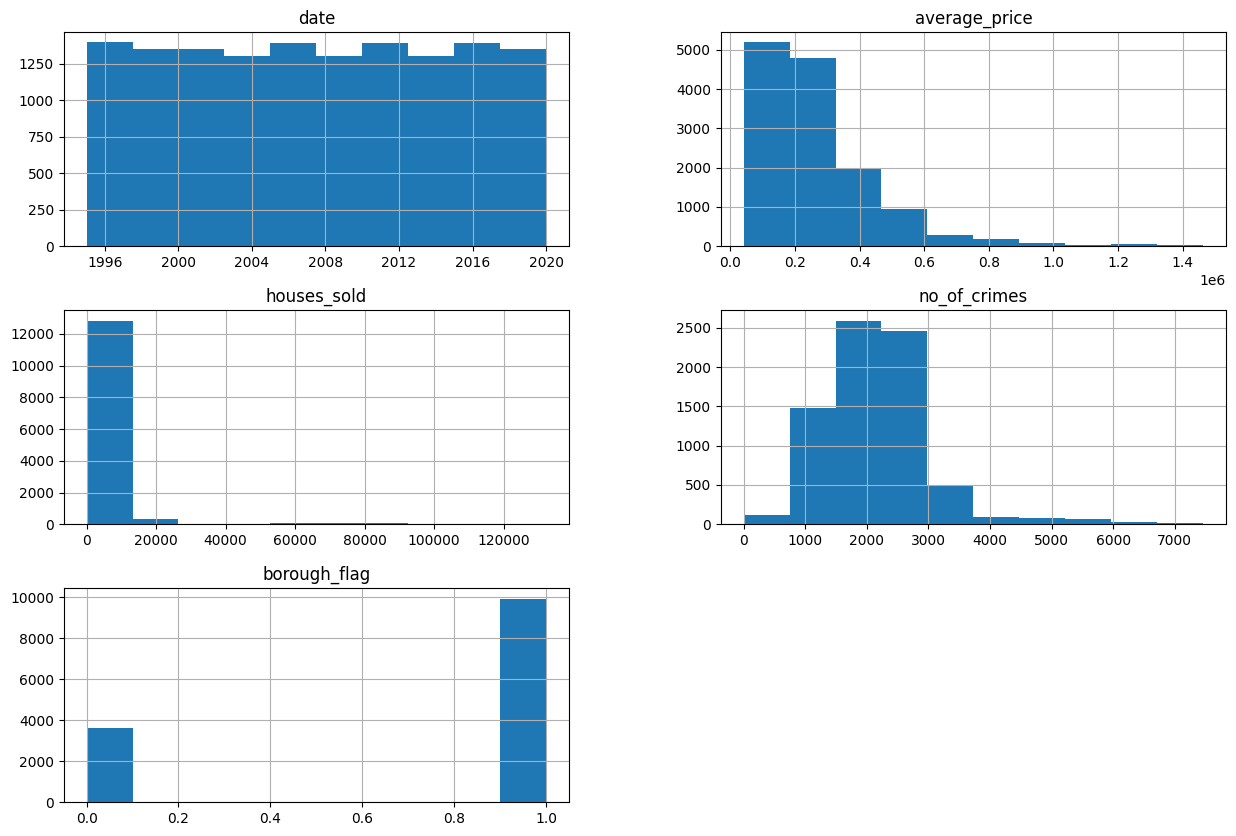

In [ ]:
data.hist(figsize=(15,10))
plt.show()

<Axes: >

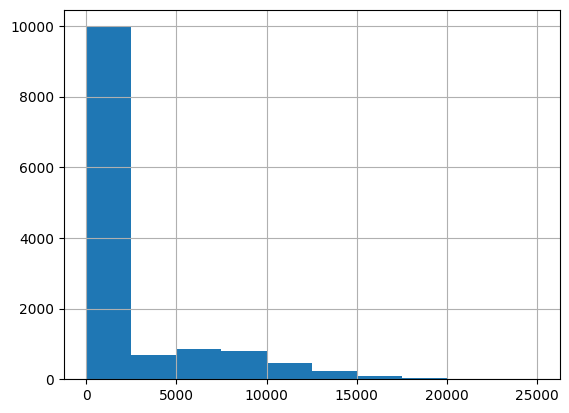

In [ ]:
# change the range to 0 to 25000 for houses_sold
data['houses_sold'].hist(range=(0,25000))

Text(0.5, 1.0, 'Houses Sold and Average Price Against Number of Crimes')

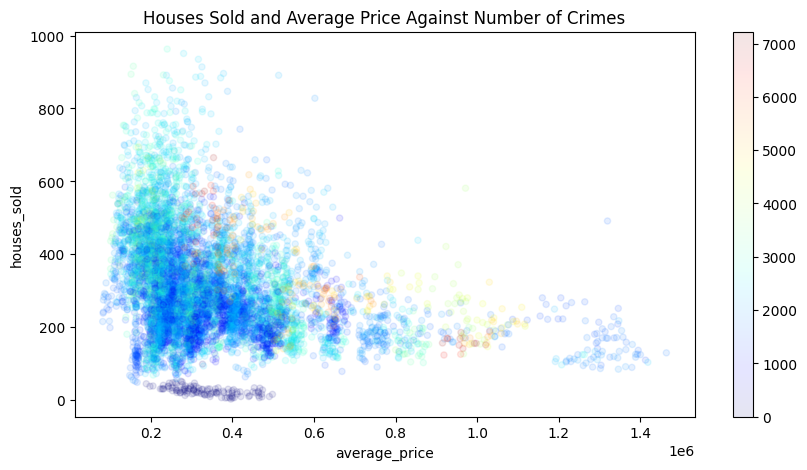

In [ ]:
data.plot(kind= 'scatter',
          x='average_price',
          y ='houses_sold',
          alpha=.1,
          c= data['no_of_crimes'],
          cmap=plt.get_cmap('jet'),
          colorbar=True,
          figsize=(10,5),
          sharex=False)
plt.title('Houses Sold and Average Price Against Number of Crimes')

In [ ]:
# correlations
corr_matrix = data.corr()
corr_matrix['average_price'].sort_values(ascending=False)

<ipython-input-14-3f26bdee3dff>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


average_price    1.000000
borough_flag     0.293271
no_of_crimes     0.113835
houses_sold     -0.168256
Name: average_price, dtype: float64

Handling the Date Column

By separating the month and year from the date, we can investigate if there is a seasonality component to average housing prices. 通過將月份和年份與日期分開，我們可以調查平均房價是否存在季節性因素。

In [ ]:
data['year'] = data['date'].dt.year
data['month']= data['date'].dt.month

In [ ]:
data.head()

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag,year,month
0,1995-01-01,city of london,91449,E09000001,17.0,NaN,1,1995,1
1,1995-02-01,city of london,82203,E09000001,7.0,NaN,1,1995,2
2,1995-03-01,city of london,79121,E09000001,14.0,NaN,1,1995,3
3,1995-04-01,city of london,77101,E09000001,7.0,NaN,1,1995,4
4,1995-05-01,city of london,84409,E09000001,10.0,NaN,1,1995,5


相關性的值在-1到1之間，當值接近1時表示正相關，接近-1時表示負相關，接近0時表示無相關性

In [ ]:
# correlation of average prices with day and month
yr_corr=data['average_price'].corr(data['year'])  #"average_price" 和 "year" 這兩個變數之間的相關性
mon_corr=data['average_price'].corr(data['month']) #"average_price" 和 "month" 這兩個變數之間的相關性
print(' Year and Avg.Price Correlation:', yr_corr,'\n','Month and Avg. Price Correlation:', mon_corr)

 Year and Avg.Price Correlation: 0.6640450565926829 
 Month and Avg. Price Correlation: 0.023212514469309924


x 軸為 "average_price"，y 軸為 "houses_sold"，點的大小根據 "no_of_crimes" 的數值變化，點的顏色根據 "year" 的數值變化，並且顯示顏色欄來對應顏色與數值的對應關係。這樣的散點圖可以幫助我們觀察 "average_price"、"houses_sold" 和 "no_of_crimes" 之間的趨勢和相關性，同時也能看到不同年份的數據在這個圖上的分布情況。








<Axes: xlabel='average_price', ylabel='houses_sold'>

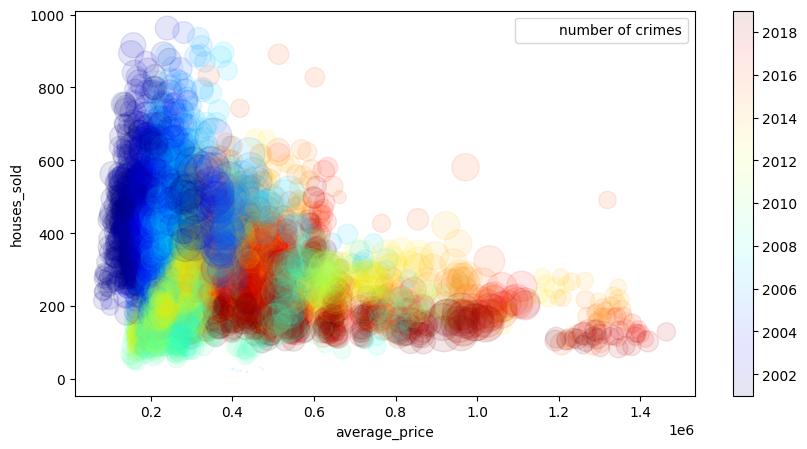

In [ ]:
data.plot(kind= 'scatter',#繪製散點圖          #average_price跟houses_sold還有number of crimes的關係
          x='average_price',
          y ='houses_sold',
          s = data['no_of_crimes']/10,  #使用"no_of_crimes"的數值來調整散點圖中點的大小。這裡將"no_of_crimes"的值除以10來縮放點的大小
          alpha=.1,            #設定點的透明度，這裡設定為 0.1，表示點的顏色會有輕微的透明效果
          label='number of crimes',
          c= data['year'],        #使用"year"的數值來設定散點圖中點的顏色。不同年份的點會有不同的顏色。
          cmap=plt.get_cmap('jet'),
          colorbar=True,
          figsize=(10,5),         #寬度為 10，高度為 5
          sharex=False)

# Split the Data

In [ ]:
# make copy first   #用一條解決
df_copy = data.copy()

經過這段程式碼後，train_set 和 test_set 就是分別用於訓練和測試的資料集。由於這是分層隨機抽樣，所以在 train_set 和 test_set 中，不同 "borough_flag" 的比例應該是相同的，確保了資料集的代表性和可靠性。

In [ ]:
# splitting the data with Stratified Shuffling將資料集進行分層隨機抽樣（Stratified Shuffling），將資料分為訓練集和測試集
split=StratifiedShuffleSplit(n_splits=1, test_size=.2, random_state=42)  #n_splits=1 表示只進行一次抽樣,t資料抽樣成測試集的比例為 20%,是設定隨機種子,r確保每次執行程式碼時抽樣結果相同
for train_index, test_index in split.split(df_copy, df_copy['borough_flag']):
    train_set= df_copy.loc[train_index]
    test_set = df_copy.loc[test_index]

訓練集中 "borough_flag" （是否為倫敦的行政區）的比例是否與原始資料集中 "borough_flag" 的比例相同。
輸出的結果可以用於檢查分層隨機抽樣是否成功，確保在訓練集中的 "borough_flag" 分佈與原始資料集中的 "borough_flag" 分佈相似，確保了訓練集的代表性和可靠性。如果比例相近，則表示分層隨機抽樣成功。

In [ ]:
# confirm results
print('Training:', train_set['borough_flag'].value_counts()/len(train_set)) #計算每個類別的數量，然後除以len(df_copy)總樣本數，得到每個類別的相對頻率。
print()
print('Original:', df_copy['borough_flag'].value_counts()/len(df_copy))

Training: 1    0.73337
0    0.26663
Name: borough_flag, dtype: float64

Original: 1    0.733338
0    0.266662
Name: borough_flag, dtype: float64


用於顯示訓練集和測試集的樣本數量，將資料集劃分為訓練集和測試集，訓練集用於建立模型，測試集用於評估模型的性能。因此，樣本數量對於模型的訓練和評估都是重要的參考指標。

In [ ]:
print('Length of Training Set :', len(train_set))
print('Length of Testing Set :', len(test_set))

Length of Training Set : 10839
Length of Testing Set : 2710


# Data Preparation

Removing the Noisy Rows

經過這段程式碼後，cleaned_train 資料框中的行不再同時具有 "houses_sold" 和 "no_of_crimes" 的缺失值。這有助於確保訓練集中的數據質量，並準備進一步用於機器學習模型訓練。

In [ ]:
# dropping rows with both missing no_of_crimes and houses_sold
missing = train_set[(train_set['houses_sold'].isna()) & (train_set['no_of_crimes'].isna())]
outer=train_set.merge(missing, how='outer', indicator =True)  #採用外部合併,即將兩個資料框的所有行合併,缺失的值用NaN填充
# return all rows in the first DF that is not in the missing DF
cleaned_train = outer[(outer._merge=='left_only')].drop('_merge', axis=1)   #"left_only"表示這些行來自於訓練集train_set,而不在missing中,即這些行具有非缺失的"houses_sold"或"no_of_crimes"

In [ ]:
outer

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag,year,month,_merge
0,2013-10-01,england,185358,E92000001,75111.0,NaN,0,2013,10,left_only
1,2014-05-01,redbridge,293705,E09000026,298.0,1668.0,1,2014,5,left_only
2,1996-05-01,london,77215,E12000007,11110.0,NaN,0,1996,5,left_only
3,2013-05-01,bromley,289506,E09000006,475.0,1559.0,1,2013,5,left_only
4,2004-10-01,hounslow,225262,E09000018,353.0,2293.0,1,2004,10,left_only
...,...,...,...,...,...,...,...,...,...,...
10834,2003-09-01,lambeth,206706,E09000022,557.0,3796.0,1,2003,9,left_only
10835,2016-08-01,lambeth,529867,E09000022,298.0,3148.0,1,2016,8,left_only
10836,2019-09-01,camden,828560,E09000007,127.0,3342.0,1,2019,9,left_only
10837,2016-09-01,havering,356744,E09000016,355.0,1410.0,1,2016,9,left_only


In [ ]:
cleaned_train

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag,year,month
0,2013-10-01,england,185358,E92000001,75111.0,NaN,0,2013,10
1,2014-05-01,redbridge,293705,E09000026,298.0,1668.0,1,2014,5
2,1996-05-01,london,77215,E12000007,11110.0,NaN,0,1996,5
3,2013-05-01,bromley,289506,E09000006,475.0,1559.0,1,2013,5
4,2004-10-01,hounslow,225262,E09000018,353.0,2293.0,1,2004,10
...,...,...,...,...,...,...,...,...,...
10834,2003-09-01,lambeth,206706,E09000022,557.0,3796.0,1,2003,9
10835,2016-08-01,lambeth,529867,E09000022,298.0,3148.0,1,2016,8
10836,2019-09-01,camden,828560,E09000007,127.0,3342.0,1,2019,9
10837,2016-09-01,havering,356744,E09000016,355.0,1410.0,1,2016,9


In [ ]:
# confirm results
print(len(missing))
print(len(train_set))
print(len(train_set)-len(missing))
print(len(cleaned_train))

24
10839
10815
10815


在 cleaned_train 資料框中，將 "houses_sold" 列中的缺失值（NaN）用 0 填充，並將填充後的結果直接應用到原始資料框 cleaned_train 中，取代原來的資料。確保了 "houses_sold" 列中的缺失值被有效地填充為 0

In [ ]:
# replacing remaining NaN values in houses_sold with 0s
cleaned_train['houses_sold'].fillna(0, inplace=True)

Imputing the NaN values

In [ ]:
train_copy = cleaned_train.copy()

In [ ]:
# ## filling in NaN values for crimes with the overall average.
mean = train_copy['no_of_crimes'].mean()         #"no_of_crimes"列的整體平均值，並將結果存入mean變數
train_copy['no_of_crimes'].fillna(mean, inplace=True)   #將"no_of_crimes"列中的缺失值填充為mean變數中的整體平均值

In [ ]:
train_copy

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag,year,month
0,2013-10-01,england,185358,E92000001,75111.0,2155.174954,0,2013,10
1,2014-05-01,redbridge,293705,E09000026,298.0,1668.000000,1,2014,5
2,1996-05-01,london,77215,E12000007,11110.0,2155.174954,0,1996,5
3,2013-05-01,bromley,289506,E09000006,475.0,1559.000000,1,2013,5
4,2004-10-01,hounslow,225262,E09000018,353.0,2293.000000,1,2004,10
...,...,...,...,...,...,...,...,...,...
10834,2003-09-01,lambeth,206706,E09000022,557.0,3796.000000,1,2003,9
10835,2016-08-01,lambeth,529867,E09000022,298.0,3148.000000,1,2016,8
10836,2019-09-01,camden,828560,E09000007,127.0,3342.000000,1,2019,9
10837,2016-09-01,havering,356744,E09000016,355.0,1410.000000,1,2016,9


Encoding categorical variable(s)

In [ ]:
# 使用 get_dummies 進行 One-Hot Encoding
one_hot_encoded = pd.get_dummies(train_copy['area'])

In [ ]:
# 合併 One-Hot Encoding 的結果至原始資料集
train_copy = pd.concat([train_copy, one_hot_encoded], axis=1)

In [ ]:
train_copy

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag,year,month,barking and dagenham,...,south east,south west,southwark,sutton,tower hamlets,waltham forest,wandsworth,west midlands,westminster,yorks and the humber
0,2013-10-01,england,185358,E92000001,75111.0,2155.174954,0,2013,10,0,...,0,0,0,0,0,0,0,0,0,0
1,2014-05-01,redbridge,293705,E09000026,298.0,1668.000000,1,2014,5,0,...,0,0,0,0,0,0,0,0,0,0
2,1996-05-01,london,77215,E12000007,11110.0,2155.174954,0,1996,5,0,...,0,0,0,0,0,0,0,0,0,0
3,2013-05-01,bromley,289506,E09000006,475.0,1559.000000,1,2013,5,0,...,0,0,0,0,0,0,0,0,0,0
4,2004-10-01,hounslow,225262,E09000018,353.0,2293.000000,1,2004,10,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,2003-09-01,lambeth,206706,E09000022,557.0,3796.000000,1,2003,9,0,...,0,0,0,0,0,0,0,0,0,0
10835,2016-08-01,lambeth,529867,E09000022,298.0,3148.000000,1,2016,8,0,...,0,0,0,0,0,0,0,0,0,0
10836,2019-09-01,camden,828560,E09000007,127.0,3342.000000,1,2019,9,0,...,0,0,0,0,0,0,0,0,0,0
10837,2016-09-01,havering,356744,E09000016,355.0,1410.000000,1,2016,9,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# 移除原始類別特徵列 'area'
train_copy = train_copy.drop('area', axis=1)
train_copy

,date,average_price,code,houses_sold,no_of_crimes,borough_flag,year,month,barking and dagenham,barnet,...,south east,south west,southwark,sutton,tower hamlets,waltham forest,wandsworth,west midlands,westminster,yorks and the humber
0,2013-10-01,185358,E92000001,75111.0,2155.174954,0,2013,10,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2014-05-01,293705,E09000026,298.0,1668.000000,1,2014,5,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1996-05-01,77215,E12000007,11110.0,2155.174954,0,1996,5,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2013-05-01,289506,E09000006,475.0,1559.000000,1,2013,5,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2004-10-01,225262,E09000018,353.0,2293.000000,1,2004,10,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,2003-09-01,206706,E09000022,557.0,3796.000000,1,2003,9,0,0,...,0,0,0,0,0,0,0,0,0,0
10835,2016-08-01,529867,E09000022,298.0,3148.000000,1,2016,8,0,0,...,0,0,0,0,0,0,0,0,0,0
10836,2019-09-01,828560,E09000007,127.0,3342.000000,1,2019,9,0,0,...,0,0,0,0,0,0,0,0,0,0
10837,2016-09-01,356744,E09000016,355.0,1410.000000,1,2016,9,0,0,...,0,0,0,0,0,0,0,0,0,0


Remove unnecessary columns

In [ ]:
train_copy=train_copy.drop(columns= ['code', 'date'])   #'code' 和 'date' 這三個欄位（特徵）刪除
# final look at features
train_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10815 entries, 0 to 10838
Data columns (total 51 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   average_price           10815 non-null  int64  
 1   houses_sold             10815 non-null  float64
 2   no_of_crimes            10815 non-null  float64
 3   borough_flag            10815 non-null  int64  
 4   year                    10815 non-null  int64  
 5   month                   10815 non-null  int64  
 6   barking and dagenham    10815 non-null  uint8  
 7   barnet                  10815 non-null  uint8  
 8   bexley                  10815 non-null  uint8  
 9   brent                   10815 non-null  uint8  
 10  bromley                 10815 non-null  uint8  
 11  camden                  10815 non-null  uint8  
 12  city of london          10815 non-null  uint8  
 13  croydon                 10815 non-null  uint8  
 14  ealing                  10815 non-null

# Model Selection and Training

In [ ]:
# extract the target variable, average_price
housing_tr = train_copy.drop('average_price', axis=1) #不包含"average_price"的特徵資料集，只包含其他特徵變數
prices_tr= train_copy['average_price'].copy()      #單獨包含目標變數 "average_price" 的資料集

In [ ]:
prices_tr

0        185358
1        293705
2         77215
3        289506
4        225262
          ...  
10834    206706
10835    529867
10836    828560
10837    356744
10838    562039
Name: average_price, Length: 10815, dtype: int64

In [ ]:
housing_tr

,houses_sold,no_of_crimes,borough_flag,year,month,barking and dagenham,barnet,bexley,brent,bromley,...,south east,south west,southwark,sutton,tower hamlets,waltham forest,wandsworth,west midlands,westminster,yorks and the humber
0,75111.0,2155.174954,0,2013,10,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,298.0,1668.000000,1,2014,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,11110.0,2155.174954,0,1996,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,475.0,1559.000000,1,2013,5,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,353.0,2293.000000,1,2004,10,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,557.0,3796.000000,1,2003,9,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10835,298.0,3148.000000,1,2016,8,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10836,127.0,3342.000000,1,2019,9,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10837,355.0,1410.000000,1,2016,9,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Linear Regression Model

In [ ]:
# creating a Linear Regression Instance and fitting
lin_reg=LinearRegression()
lin_reg.fit(housing_tr, prices_tr)

LinearRegression()

In [ ]:
prices_pred = lin_reg.predict(housing_tr)

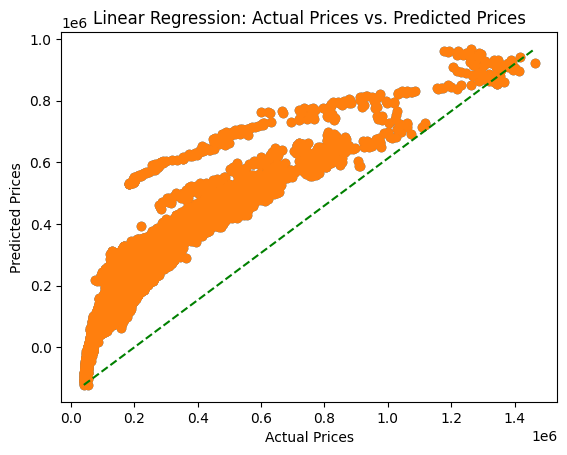

In [ ]:
#可以在散點圖上繪製回歸線，以便視覺化模型的擬合情況。
#其中X軸為原始資料的目標變數（prices_tr），Y軸為Linear Regression預測的目標變數（prices_pred）
plt.scatter(prices_tr, prices_pred)
plt.scatter(prices_tr, prices_pred)
plt.plot([min(prices_tr), max(prices_tr)], [min(prices_pred), max(prices_pred)], color='Green', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Linear Regression: Actual Prices vs. Predicted Prices')
plt.show()

In [ ]:
# predictions and mean squared error for training set
price_predictions = lin_reg.predict(housing_tr)
lin_rmse = mean_squared_error(prices_tr, price_predictions,squared=False)
lin_rmse

73538.91291353431

In [ ]:
# mean absolute error
lin_mae = mean_absolute_error(prices_tr, price_predictions)
lin_mae

49323.91019837357

Decision Tree Regressor

In [ ]:
tree_reg = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg.fit(housing_tr, prices_tr)

DecisionTreeRegressor(max_depth=3, random_state=42)

Decision Tree以圖片呈現

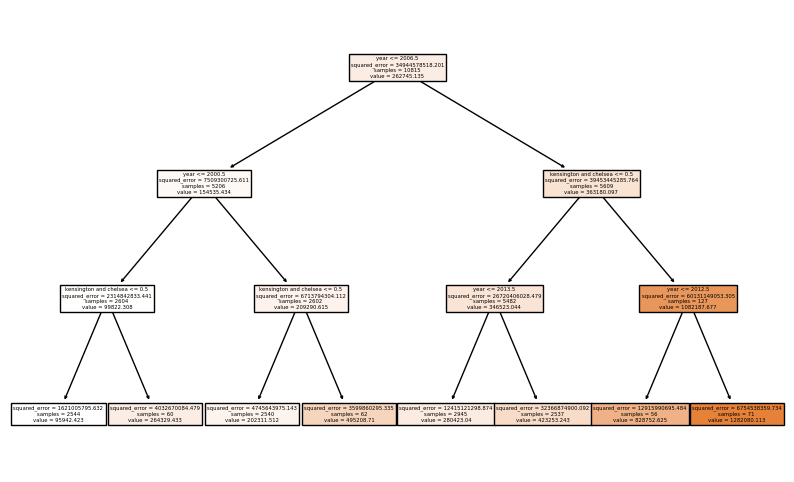

In [ ]:
plt.figure(figsize=(10, 6))
plot_tree(tree_reg, filled=True, feature_names=housing_tr.columns)
plt.show()

使用均方根誤差（Root Mean Squared Error，RMSE）評估 Decision Tree 模型在訓練集上的預測準確度
RMSE 越低，表示模型的預測效果越好，預測結果與實際值的誤差越小，代表該模型對於訓練數據集的預測結果與實際目標值之間的均方根誤差為約111766.56。

這個 RMSE 是針對訓練數據集的預測結果，可能會存在過度擬合的問題。為了更準確地評估模型的性能，通常應該使用交叉驗證等技術來進行模型評估
As you can see, Decision Tree Regressor Model has badly overfit the data. The solution it to train the Model on smaller training sets of the training set and then evaluate against the evaluation set.


In [ ]:
# 使用交叉驗證評估模型的性能
scores = cross_val_score(tree_reg, housing_tr, prices_tr, scoring="neg_mean_squared_error", cv=10) #cross_val_score進行交叉驗證，對tree_reg進行10折交叉驗證
tree_rmse_scores = np.sqrt(-scores) #交叉驗證函數返回的是負的MSE值，所以在計算RMSE時需要取絕對值。

In [ ]:
# 計算交叉驗證的平均 RMSE
tree_rmse_mean = tree_rmse_scores.mean()

print("Decision Tree Model RMSE:", tree_rmse_mean)

Decision Tree Model RMSE: 111766.56792235309


In [ ]:
# create function to display cv scores
def display_scores(scores):
    print("Scores:", scores)           #顯示模型的評估分數
    print("Mean:", scores.mean())         #計算並顯示評估分數的平均值
    print("Standard deviation:", scores.std())  #計算並顯示評估分數的標準差

In [ ]:
# view all cv scores
display_scores(tree_rmse_scores)

Scores: [113450.09674324 111421.3094634  109940.8575647  118768.04742492
 110581.75448171 109869.02848129 109945.19683593 115835.00389694
 107678.07884576 110176.30548562]
Mean: 111766.56792235309
Standard deviation: 3153.190233866213


Insights:
- Without any Fine Tuning, the Decision Tree Regressor (DTR) already produces a RMSE smaller than that of the Linear Regression (LR) Model.
- The Decision Tree Regressor has a score (RMSE) of approximately 15,723.17 ± 3,029.33.
- To be sure the DTR is better than LR, we can also train the Linear Regression Model on cross validation folds

In [ ]:
lin_scores = cross_val_score(lin_reg, housing_tr,prices_tr, scoring='neg_mean_squared_error', cv=10)
lin_rmse_scores=np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [80884.84246285 75007.72397146 75405.91173229 74948.86694529
 74518.73863037 70473.39991173 70506.18575458 74568.54872481
 67800.69565584 74198.1715311 ]
Mean: 73831.30853203229
Standard deviation: 3386.9685767153806


Random Forest Regressor

In [ ]:
forest_reg=RandomForestRegressor()
forest_reg.fit(housing_tr, prices_tr)
forest_scores = cross_val_score(forest_reg, housing_tr,prices_tr, scoring='neg_mean_squared_error', cv=10)
forest_rmse_scores=np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [14224.36744797 12736.88811923 11637.28970023 10874.78656491
 12327.35525816 11667.17661716 10239.62819706 12523.85218929
 11081.08595061 12850.2000147 ]
Mean: 12016.263005931405
Standard deviation: 1097.4670742892686
